# Prediction of Churn

In [1]:
## Improting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('churn_prediction.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
data.shape

(28382, 21)

In [5]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

Here there is missing value

# Converting the required variables into required data types

In [6]:
# converting the variables into category
data['churn']= data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data['city'] = data['city'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['gender'] = data['gender'].astype('category')

In [7]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [9]:
# converting the variables into integer
data['dependents'] = data['dependents'].astype('Int64')

In [10]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

# Extracting more information from last_transaction

In [11]:
# converting the variables into datetime data type 
date = pd.DatetimeIndex(data['last_transaction'])

In [12]:
# Converting the last_transaction into day, week,month and year
data['day_lt'] = date.dayofyear

data['week_lt'] = date.weekofyear
data['month_lt'] = date.month
data['dayofweek_lt']= date.dayofweek

In [13]:
data[['last_transaction','day_lt','week_lt','month_lt','dayofweek_lt']].head()

,last_transaction,day_lt,week_lt,month_lt,dayofweek_lt
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


In [14]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,day_lt,week_lt,month_lt,dayofweek_lt
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,1458.71,1458.71,0,2019-05-21,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,5486.27,100.56,6496.78,8787.61,0,2019-11-01,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,6046.73,259.23,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,2143.33,2291.91,1669.79,1,2019-08-06,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,588.62,1538.06,1157.15,1677.16,1,2019-11-03,307.0,44.0,11.0,6.0


# Now we can drop the column last_transaction

In [15]:
data = data.drop(columns = ['last_transaction'])
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,day_lt,week_lt,month_lt,dayofweek_lt
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,0.56,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,0.47,2143.33,2291.91,1669.79,1,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0


# Univariate Analysis

# Numerical variables

In [18]:
data.select_dtypes(include = ['int64','Int64','float']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
day_lt                            float64
week_lt                           float64
month_lt                          float64
dayofweek_lt                      float64
dtype: object

In [32]:
#grouping the variables
customer_details = ['customer_id','vintage','age']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['day_lt','week_lt','month_lt','dayofweek_lt']

In [42]:
# defining a function for easy analysis of numerical variables
def uni_var(data, var):
    size = len(var)
    plt.figure(figsize = (7*size, 3), dpi =100)
    
    
    for j, i in enumerate(var):
        # Calculating info for each variable
        mini = data[i].min()
        maxi = data[i].max()
        std = data[i].std()
        mean = data[i].mean()
        median = data[i].median()
        rang  = data[i].max() - data[i].min()
        skewness  = data[i].skew()
        kurto = data[i].kurtosis()
        
        points = mean-std, mean+std

        #plotting
        plt.subplot(1, size, j+1 )
        sns.kdeplot(data[i], shade = True)
        sns.lineplot(points, [0,0], color = 'black', label = "std")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurto,2),
                                                                                                   round(skewness,2),
                                                                                                   (round(mini,2),round(maxi,2),round(rang,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

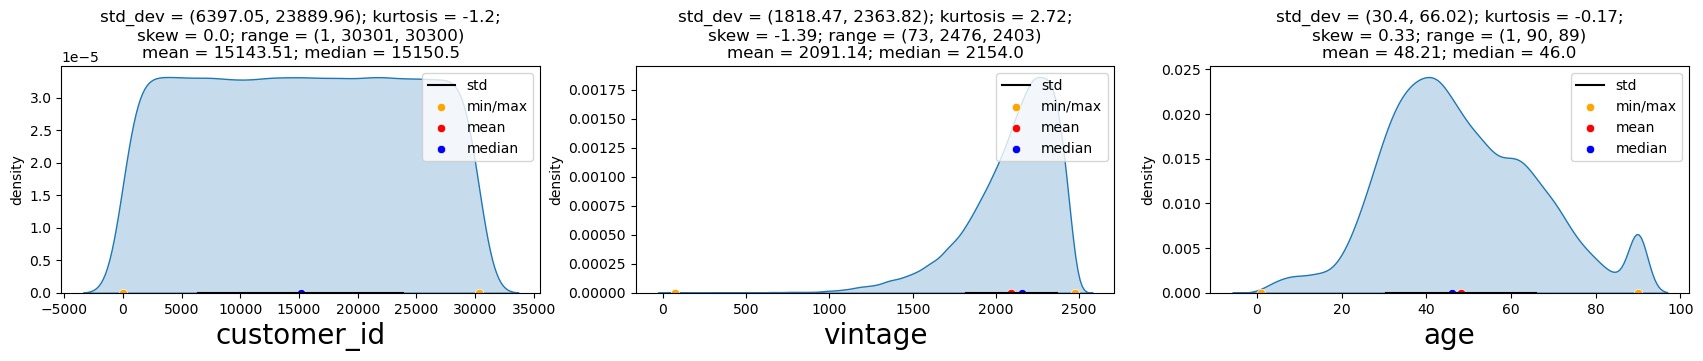

In [43]:
uni_var(data, customer_details)

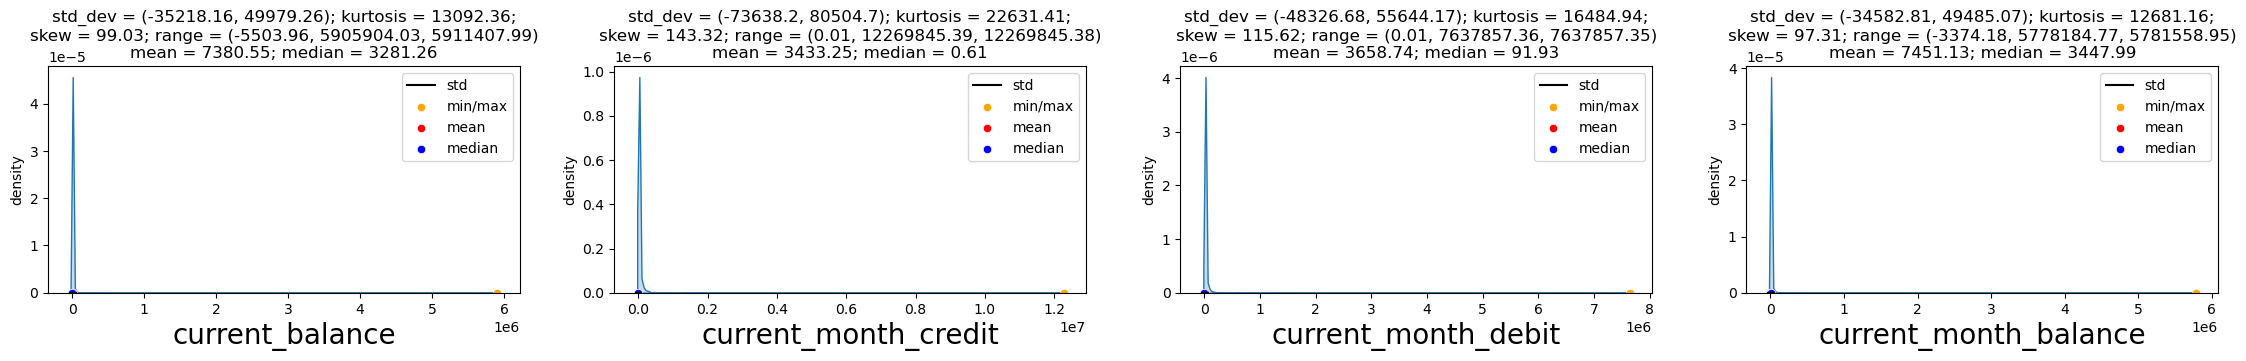

In [44]:
uni_var(data, current_month)

*The above plots of kurtosis and skewness all have outliers

# Removing outliers

In [45]:
# Standard deviation factor
factor = 3
cm_data = data[current_month]

# Considering only <3*standard deviation
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit']< factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance']< factor*cm_data['current_month_balance'].std()]

#After removing the outliers the lengths are
len(data), len(cm_data)

(28382, 27113)

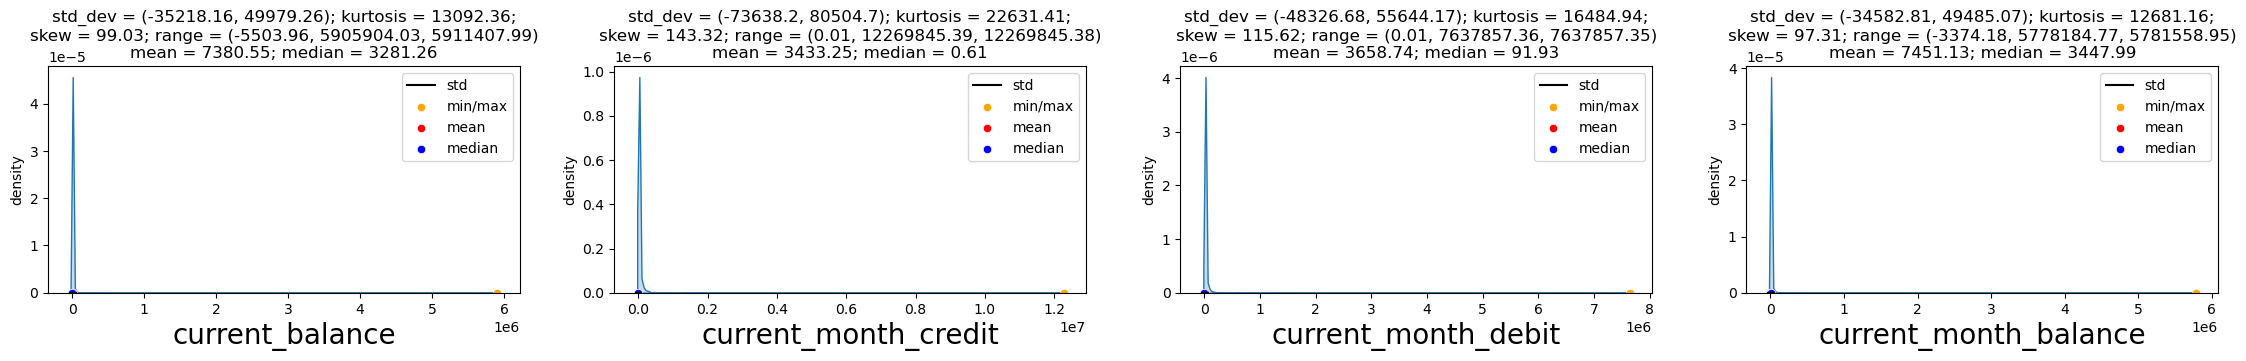

In [46]:
uni_var(data,current_month)

Even though, there are still some outliers

So we are checking for Previous Transactions, that might be effecting the current month transactions

# Previous month

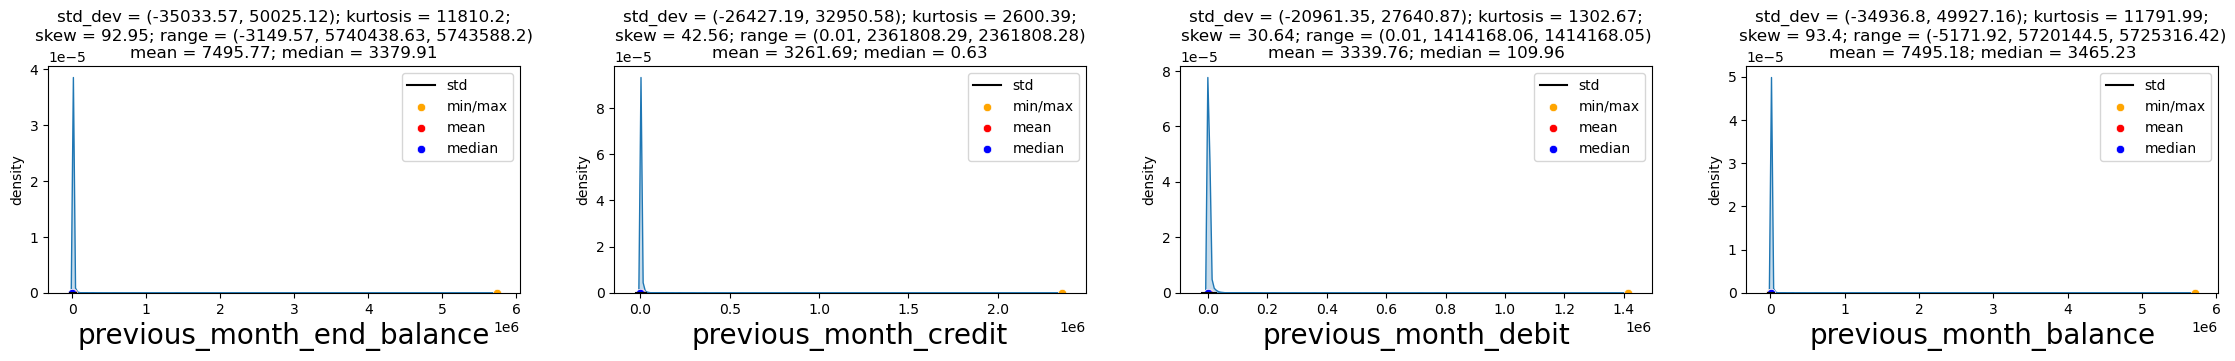

In [47]:
uni_var(data, previous_month)

Looking similar to the currnt month. So moving to previous quarters details

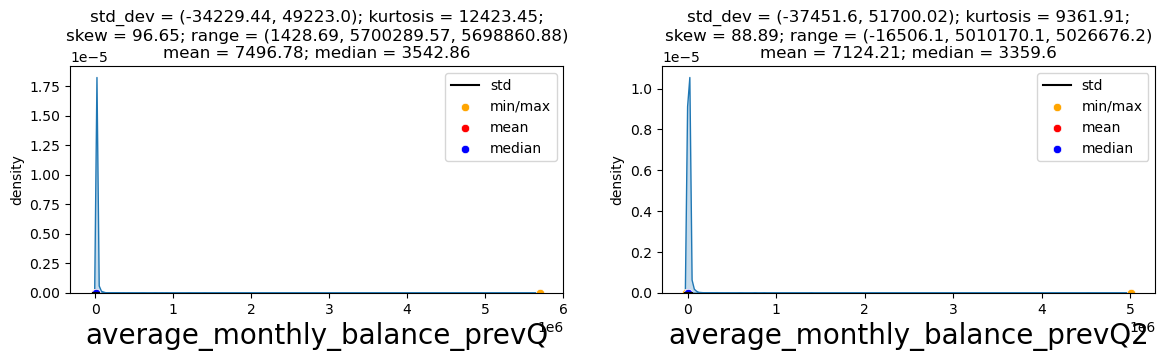

In [48]:
uni_var(data, previous_quarters)

Almost similar results

# Transaction Details

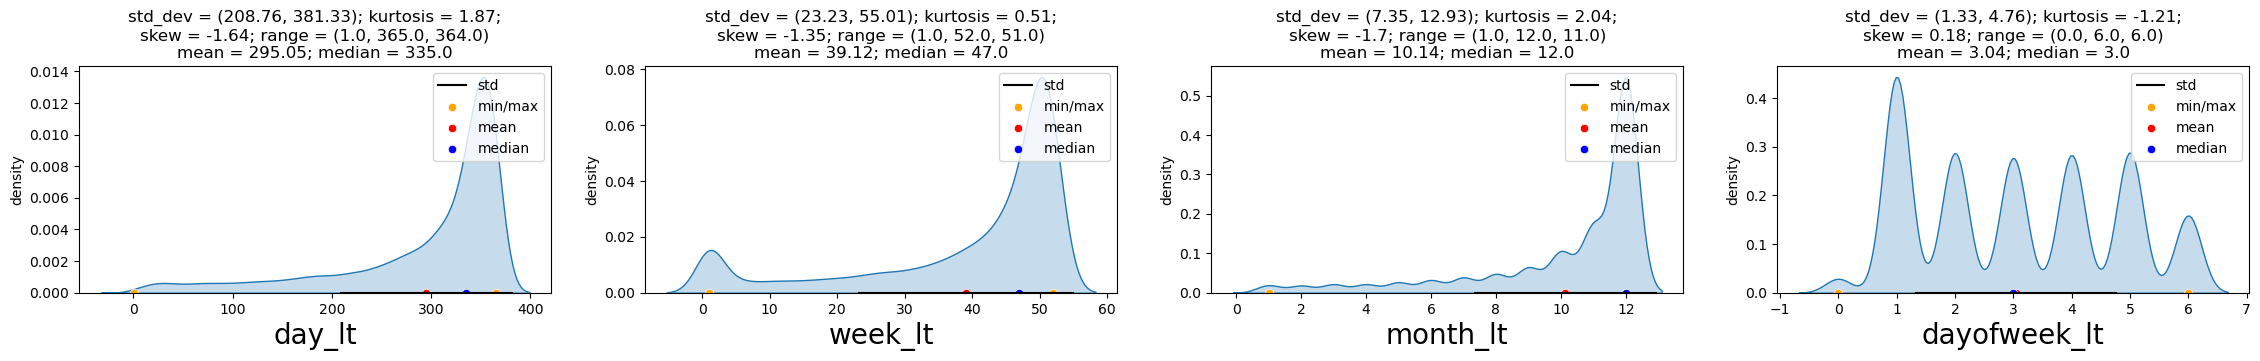

In [49]:
uni_var(data,transaction_date)

Most of the transactions made  60 days before in first plot
Most of the transactions are done 10 weeks before in second plot
High transactions are done in the month December
In week days Tuesday, most of the transactions are made

In [50]:
data.select_dtypes(exclude = ['int64','Int64','float']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [64]:
#Grouping the variables
customer_info = [ 'occupation','gender', 'customer_nw_category']
account_info = ['city', 'branch_code']
churn = ['churn']

In [55]:
# defining a function for easy analysis of numerical variables
def uni_category(data, var):
    size = len(var)
    plt.figure(figsize = (7*size, 5), dpi =100)
    
    
    for j, i in enumerate(var):
        # Calculating info for each variable
        norm_counts = data[i].value_counts(normalize = True)
        n_uniq = data[i].unique()

        #plotting
        plt.subplot(1, size, j+1 )
        sns.barplot(norm_counts, norm_counts.index, order = norm_counts.index)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.xlabel('fraction or percent', fontsize = 20)
        plt.title('n_uniques = {} \n value_counts = {} \n ;'.format(n_uniq,norm_counts))

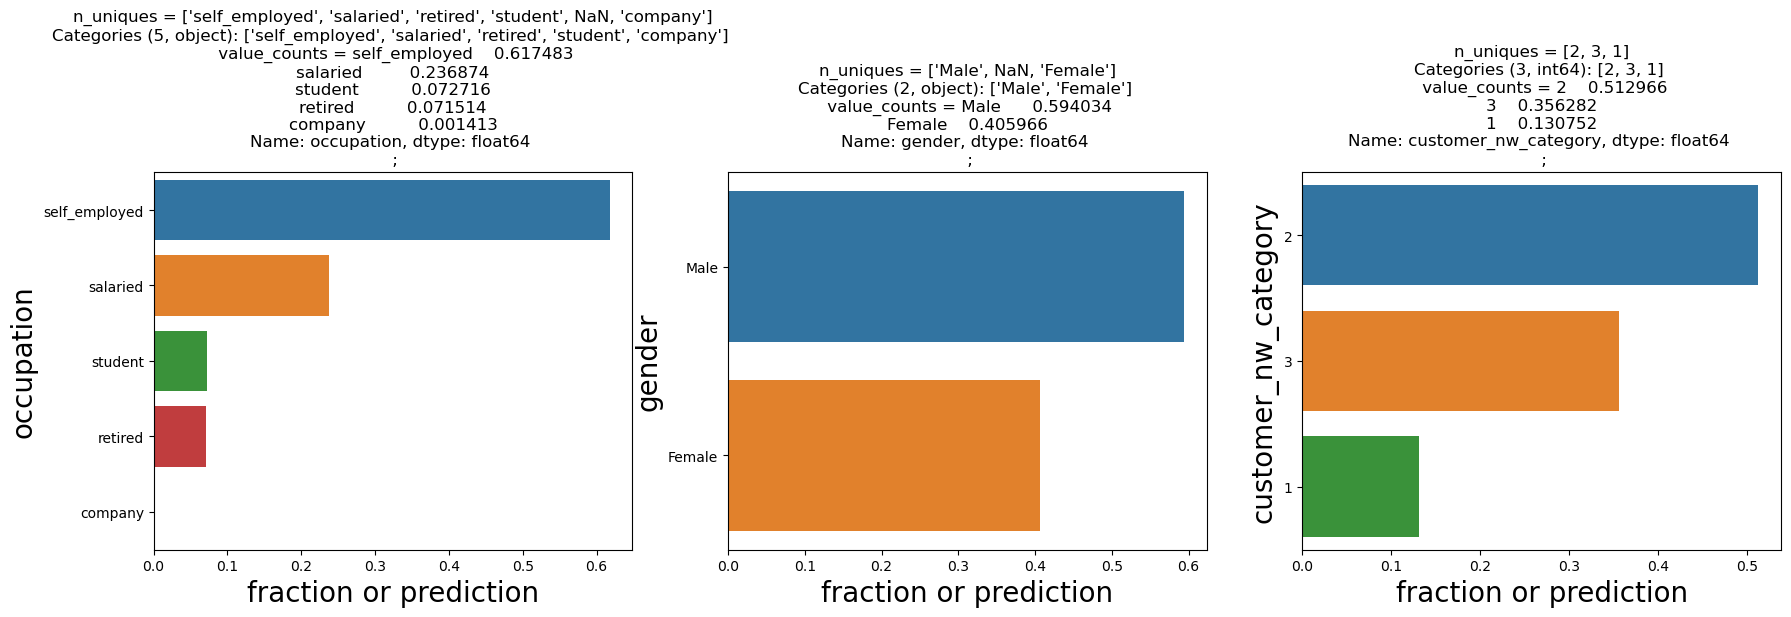

In [58]:
uni_category(data, customer_info)

Summary
 * Most of the customers are self_employed in occupation
 * Male customers are 1.5 times higher than Females
 * very less people belong to highest networth category (approximately 1.5%)
 * May be company_accounts are reason behind the outliers

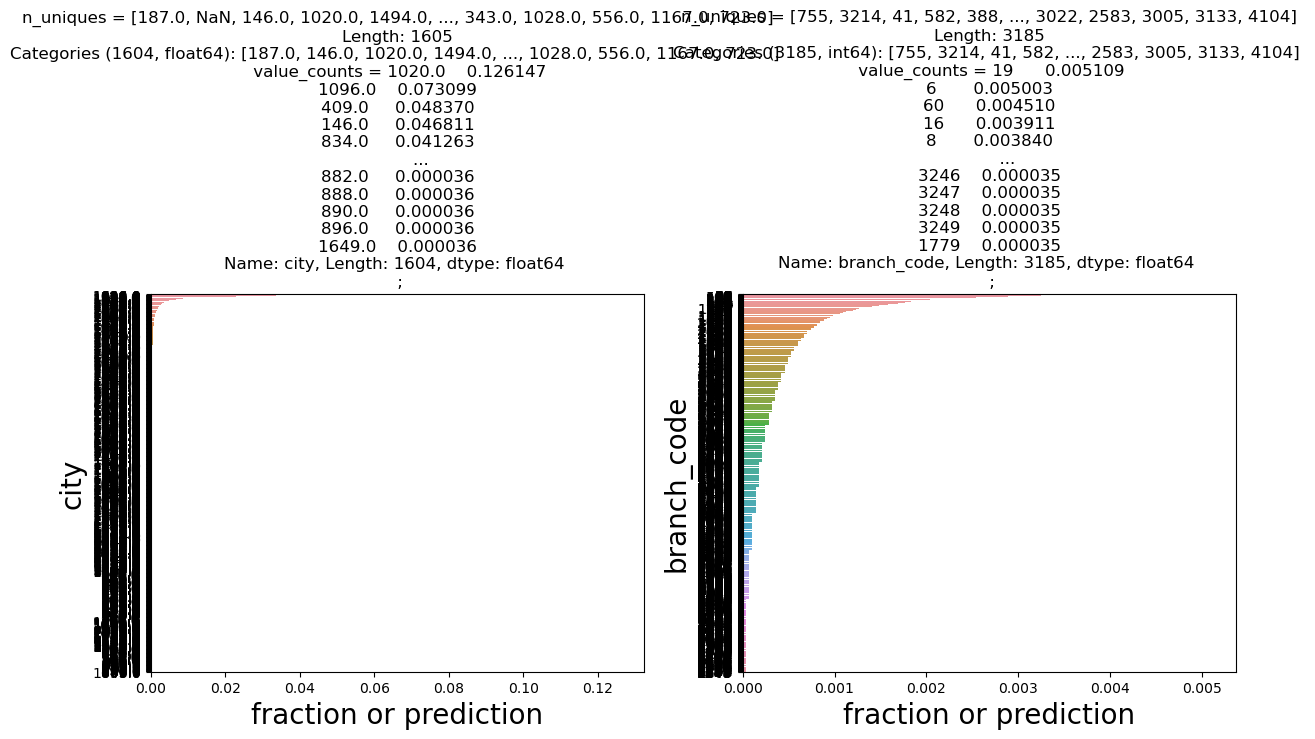

In [59]:
uni_category(data,account_info)

AS the branch_code and city has too many values and plots are not clearly visible. Let us go for invidual plot

Text(0.5, 1.0, 'branch')

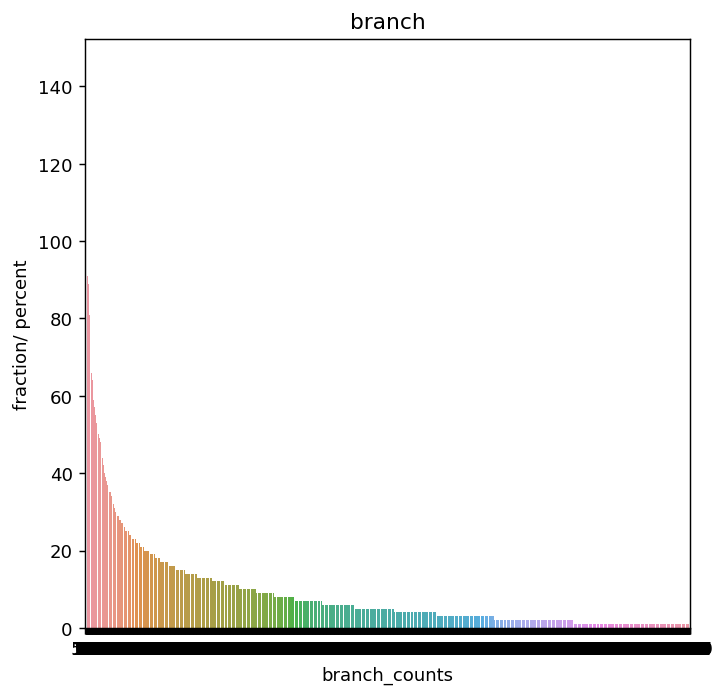

In [61]:
## plotting the branch_code
plt.figure(figsize = (6,6), dpi =130 )
branch_count = data['branch_code'].value_counts()
sns.barplot( branch_count.index, branch_count, order = branch_count.index)
plt.ylabel('fraction/ percent')
plt.xlabel('branch_counts')
plt.title('branch')


Text(0.5, 1.0, 'city')

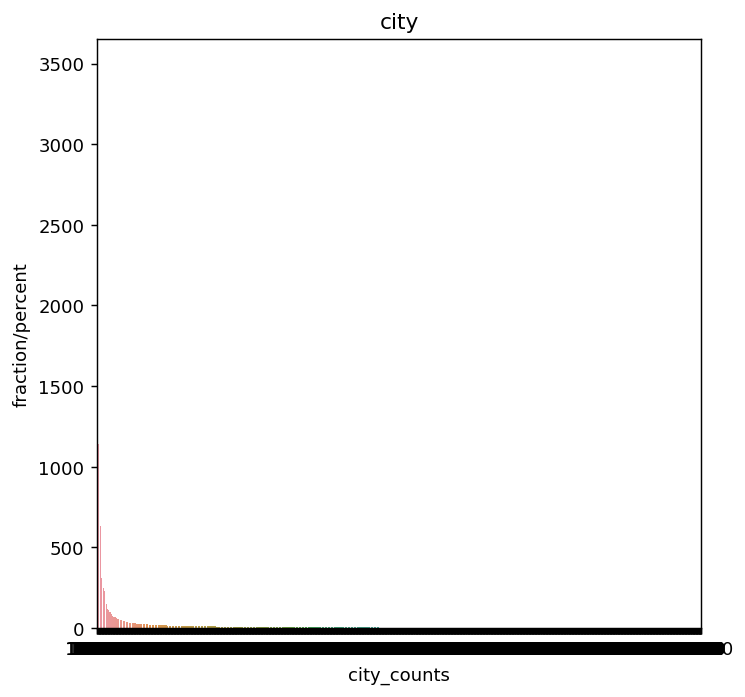

In [62]:
## plotting the city
plt.figure(figsize = (6,6), dpi =130)
city_count = data['city'].value_counts()
sns.barplot(city_count.index, city_count, order = city_count.index)
plt.ylabel('fraction/percent')
plt.xlabel('city_counts')
plt.title('city')

There are too many categories and it is clear that cutomers and branch,city are related.

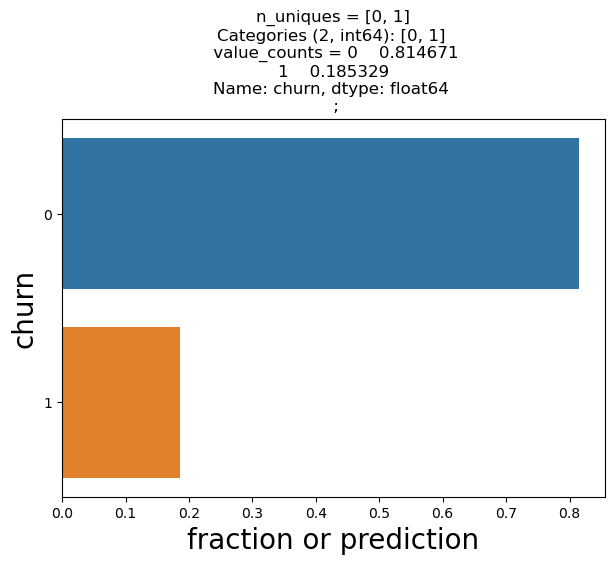

In [65]:
uni_category(data,churn)

The people who are not churned is 4 times higher than the people who are churned 

In [66]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
day_lt                            3223
week_lt                           3223
month_lt                          3223
dayofweek_lt                      3223
dtype: int64

In [99]:
def  uni_outliers(data, var, include_outliers = True):
        size = len(var)
        plt.figure(figsize = (7*size, 4), dpi = 100)
        for j,i in enumerate(var):
            q25 = data[i].quantile(0.25)
            q75 = data[i].quantile(0.75)
            iqr = q75 - q25
            upper_limit = q75 + (1.5 * iqr)
            lower_limit = q25 - (1.5 * iqr)
            med = data[i].median()
        
            ## Calculating number of outliers
            high_outliers = len(data[i][data[i] > upper_limit])
            low_outliers = len(data[i][data[i] < lower_limit])
            
            
            if include_outliers == True:
                plt.subplot(1, size, j+1)
                sns.boxplot(data[i], orient ="v")
                plt.ylabel('{}'.format(i))
                plt.title('with outliers= {}\n IQR= {};\n Median= {}\n 1st ,3rd quartile= {};\n outliers high/low={}\n'. format(round(iqr,2),
                    round(med,2), round(q25,2),round(q75,2),(high_outliers,low_outliers)
                     ))
                
            else:
                # replacing outliers with max/min whisker
                data1 = data[var][:]
                data1[i][data1[i]> upper_limit] = upper_limit+1
                data1[i][data1[i]< lower_limit] = lower_limit-1
      
                 # plotting without outliers
                plt.subplot(1,size,j+1)
                sns.boxplot(data1[i], orient ="v")
                plt.ylabel('{}'.format(i))
                plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(iqr,2),
                                                                                                   round(med,2),
                                                                                                   (round(q25,2),round(q75,2)),
                                                                                                   (high_outliers,low_outliers)
                                                                                                   ))
        

# Current_month and Previous_month

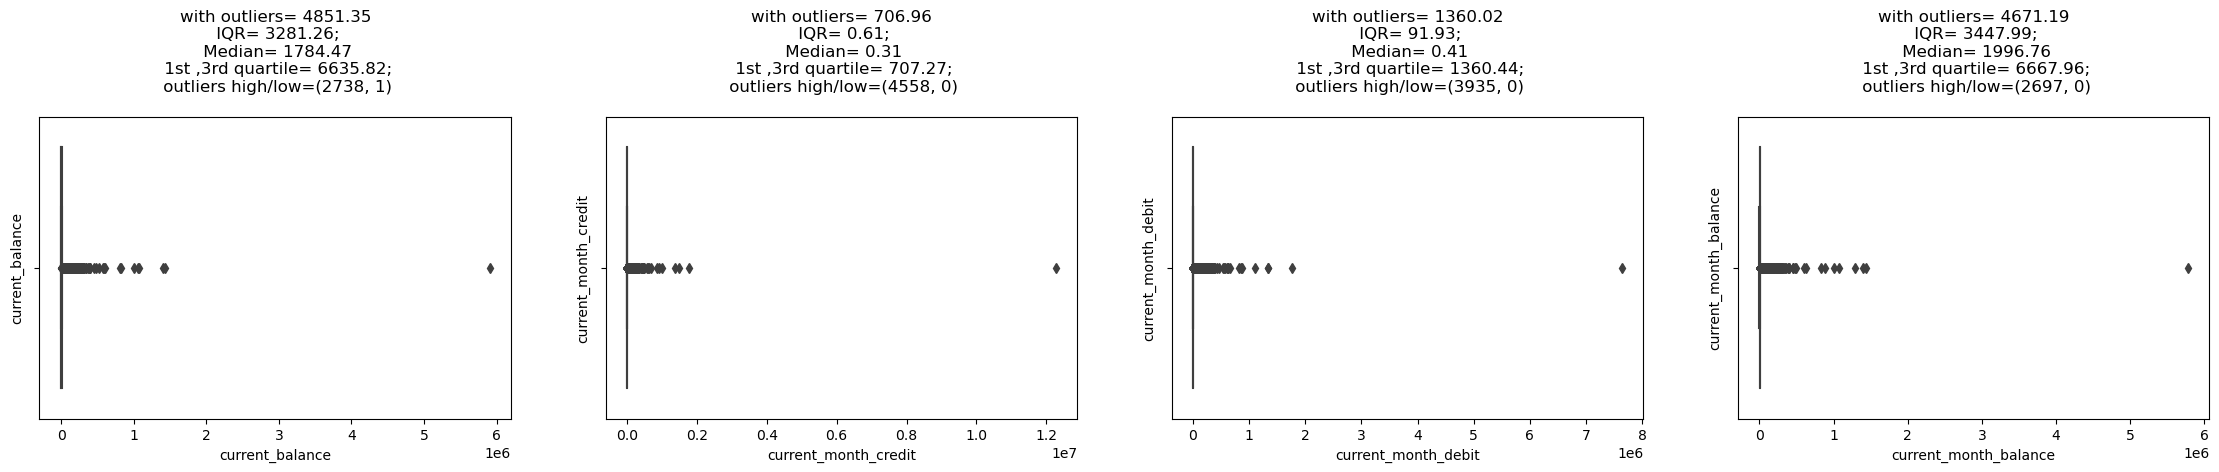

In [100]:
uni_outliers(data,current_month,)
        

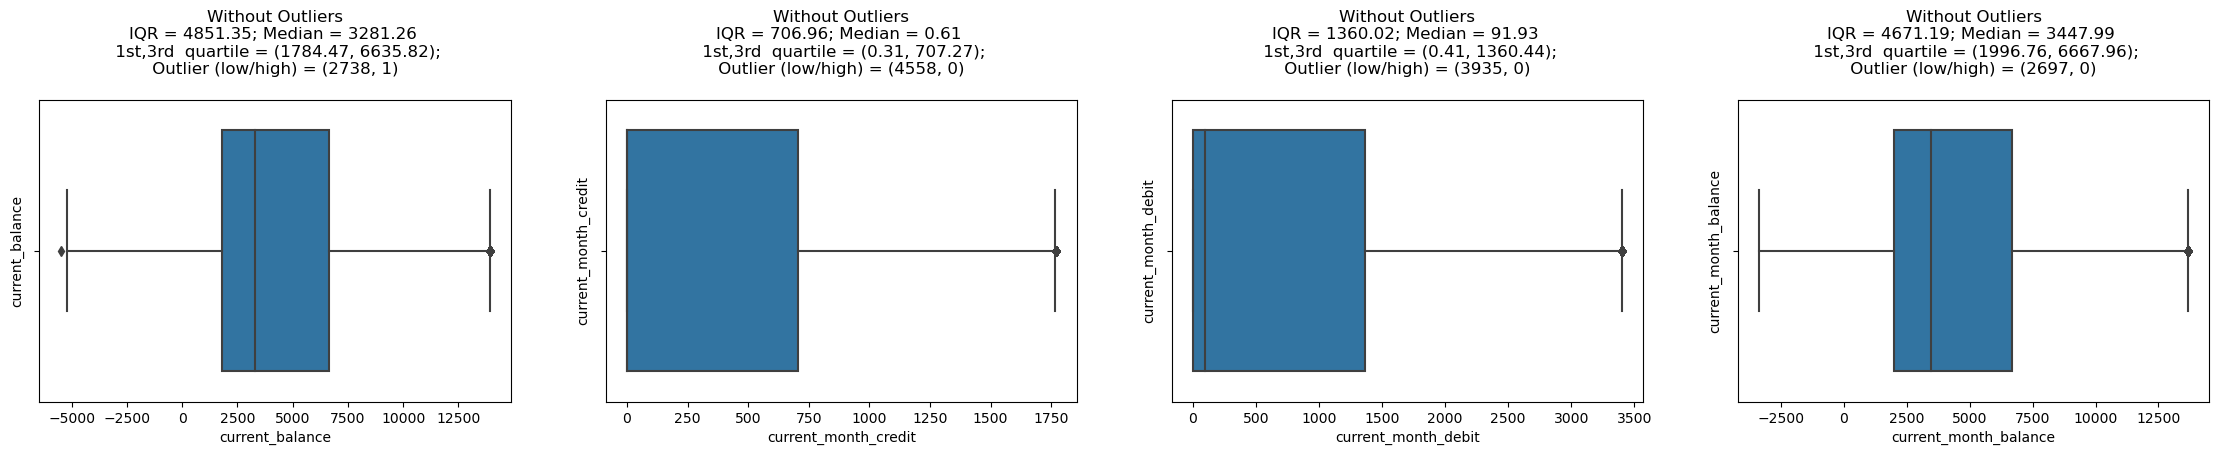

In [105]:
uni_outliers(data, current_month, include_outliers = False)

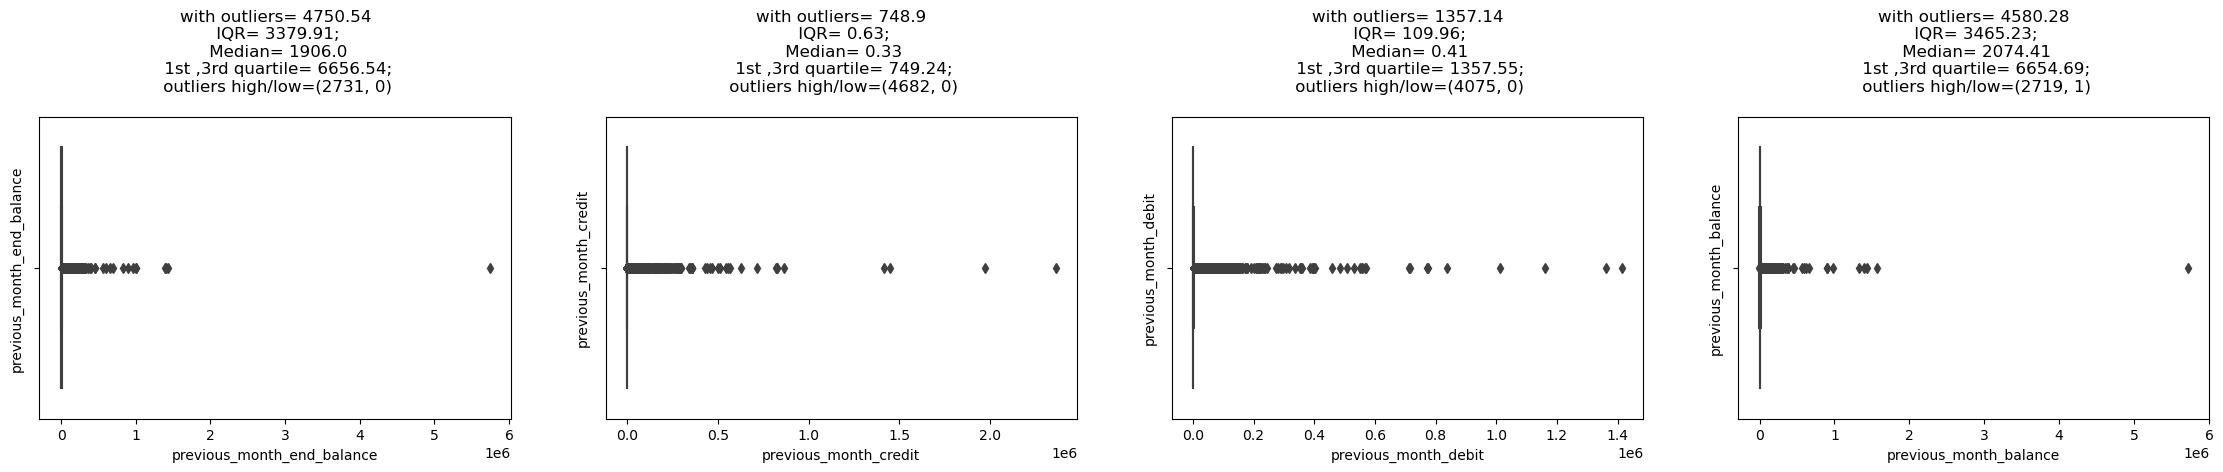

In [101]:
uni_outliers(data,previous_month,)

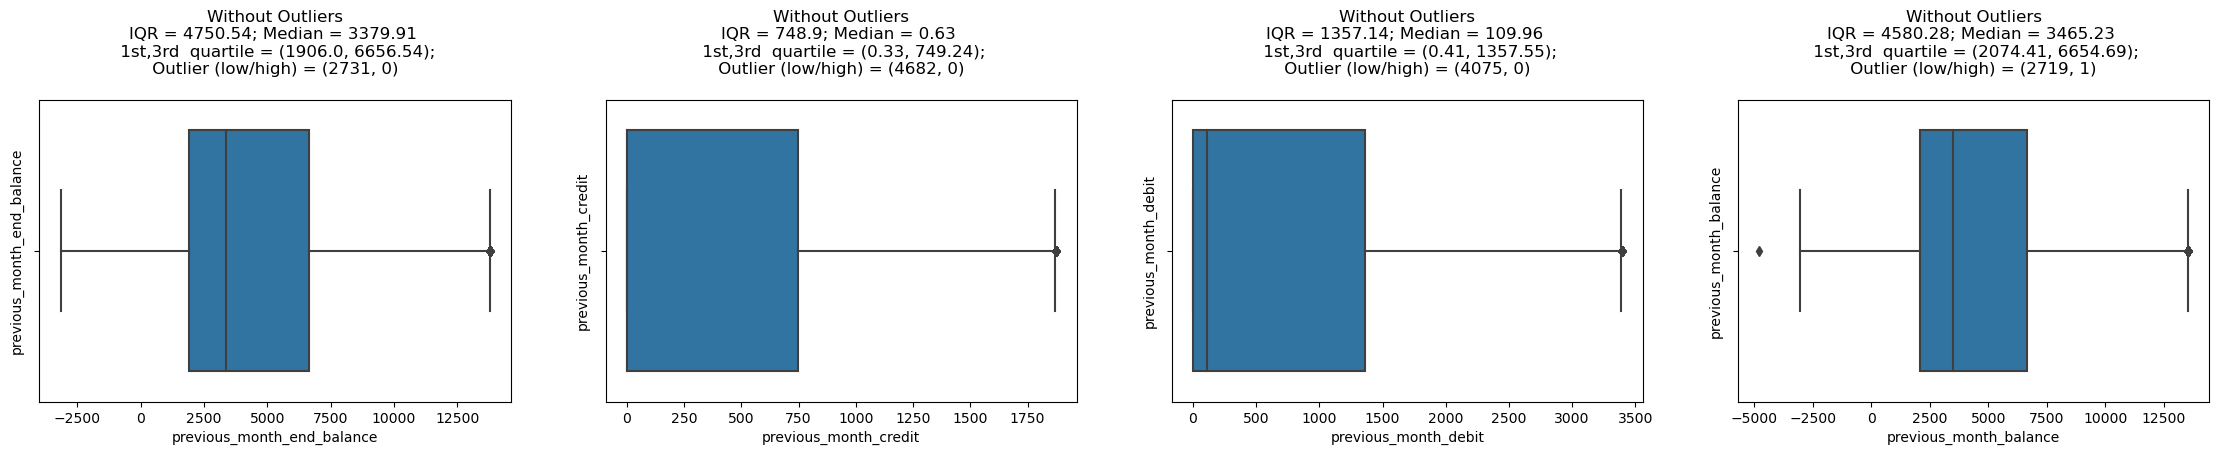

In [106]:
uni_outliers(data, previous_month, include_outliers = False)

Looking into the current_month, previous_month plot transactions both are highly related and outliers are also looking similar, this might be because of some unusual transaction leading to outliers.

# previous Quarters

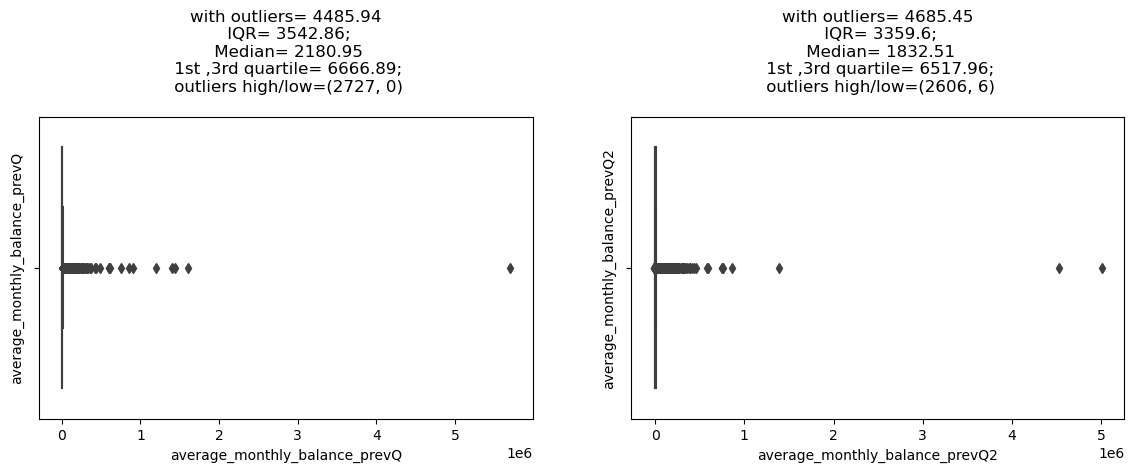

In [102]:
uni_outliers(data, previous_quarters,)

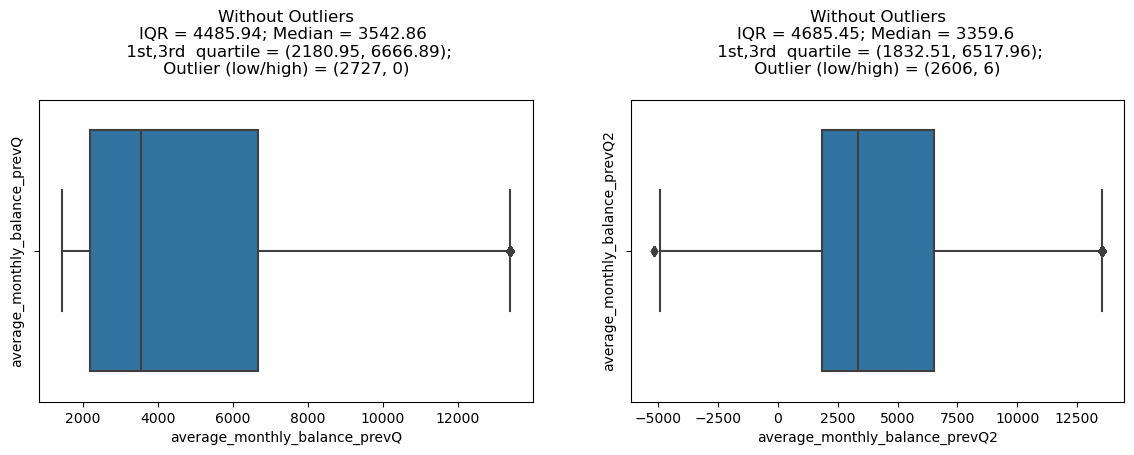

In [107]:
uni_outliers(data, previous_quarters, include_outliers = False)

 outliers are similar in previous quarters but are very large in number.

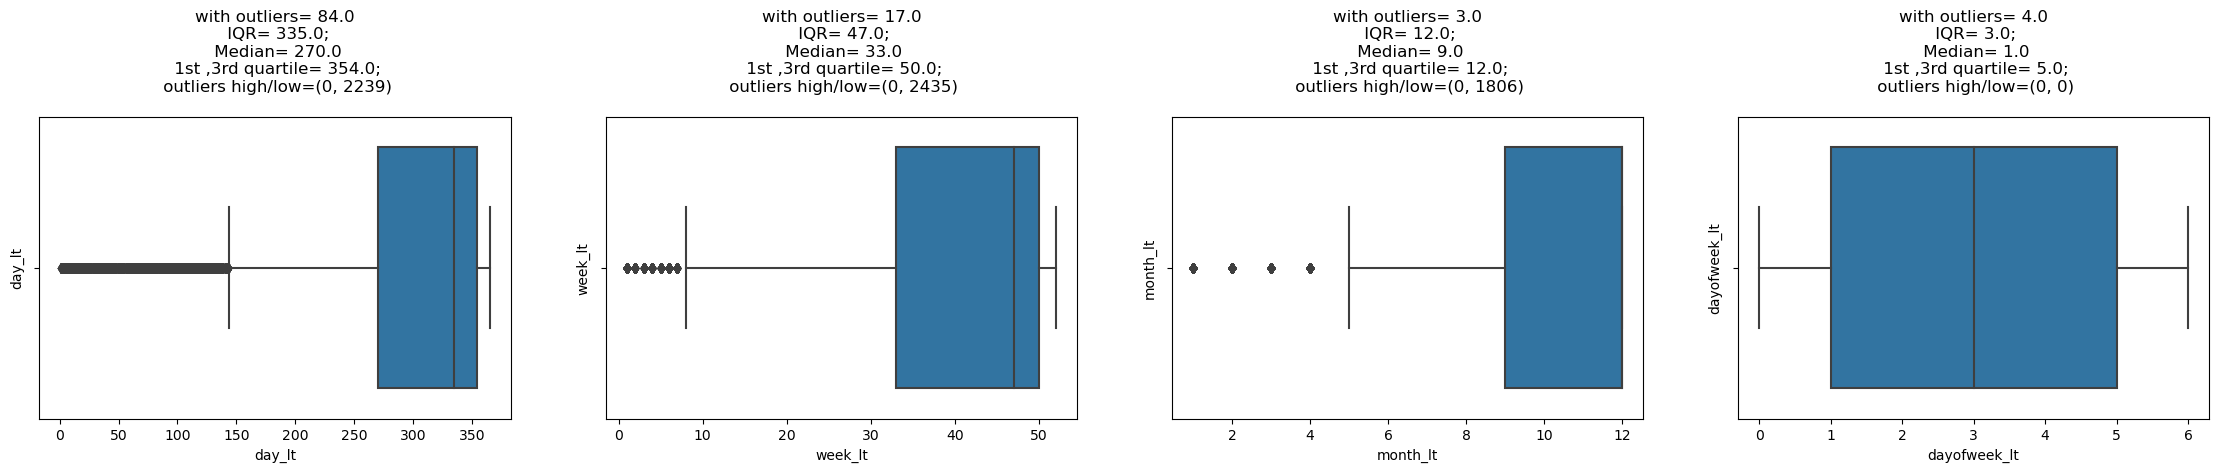

In [104]:
uni_outliers(data,transaction_date,)

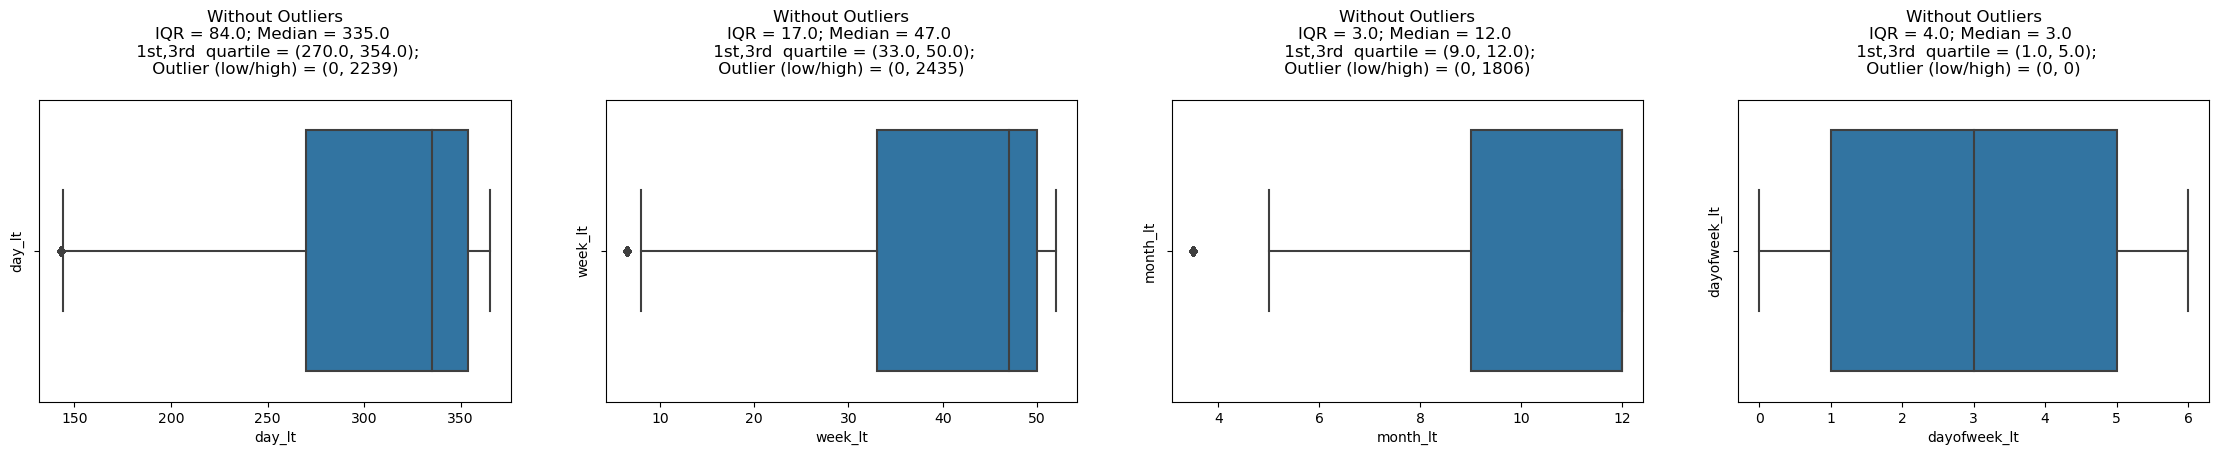

In [108]:
uni_outliers(data, transaction_date, include_outliers =False)

# Bivariate Analysis

In [109]:
numeric_columns = data.select_dtypes(include =['int64','float', 'Int64'])[:]
numeric_columns.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
day_lt                            float64
week_lt                           float64
month_lt                          float64
dayofweek_lt                      float64
dtype: object

# Constructing Correlation matrix

In [111]:
correlation = numeric_columns.dropna().corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,day_lt,week_lt,month_lt,dayofweek_lt
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,0.011344,-0.005374,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.010040,-0.001359,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.000501,0.011970,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.034460,0.077978,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,-0.008980,0.033127,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.000946,0.023485,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,-0.000577,0.020949,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,-0.012720,0.009123,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.008664,0.030267,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.016762,0.066691,-0.006657


# Heatmap

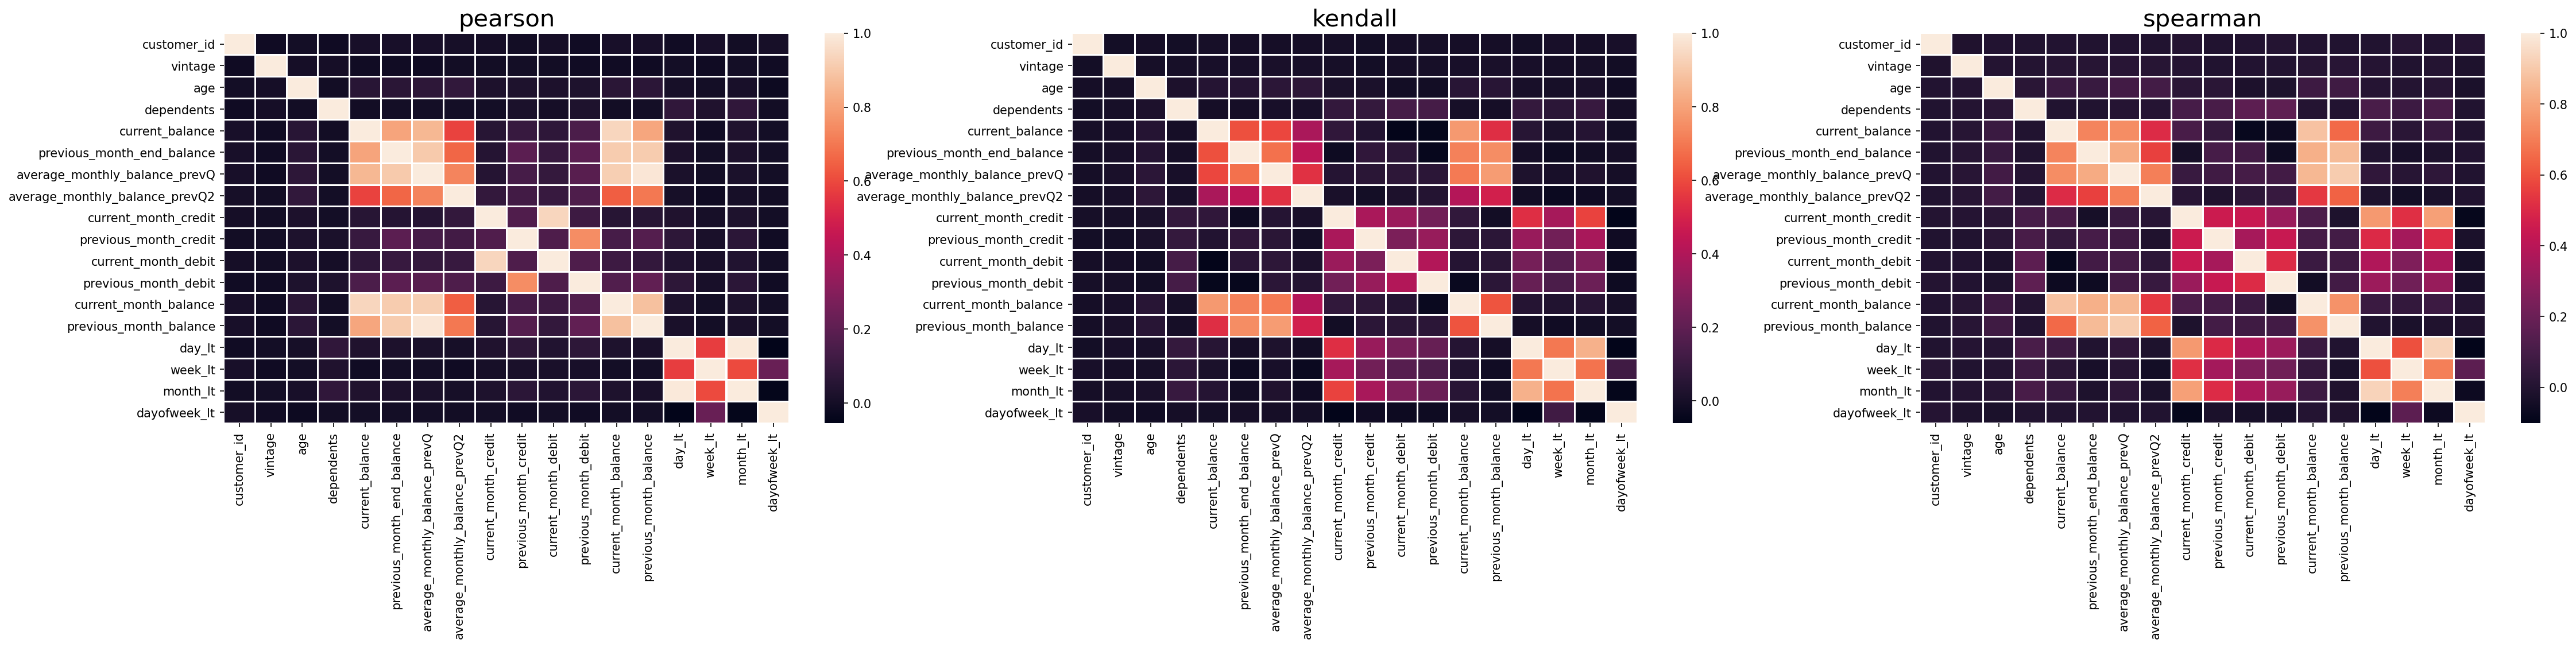

In [115]:
plt.figure(figsize = (36,6), dpi =150)
for j, i in enumerate(['pearson','kendall','spearman']):
        plt.subplot(1,3,j+1)
        correlation = numeric_columns.dropna().corr(method = i)
        sns.heatmap(correlation, linewidth = 1)
        plt.title(i, fontsize = 20)

* kendall and spearman are looking similar with slight variation in magnitude of correlation 
* most of the correlated variables are transactions and balance

In [116]:
# extracting the transaction and balance variables
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

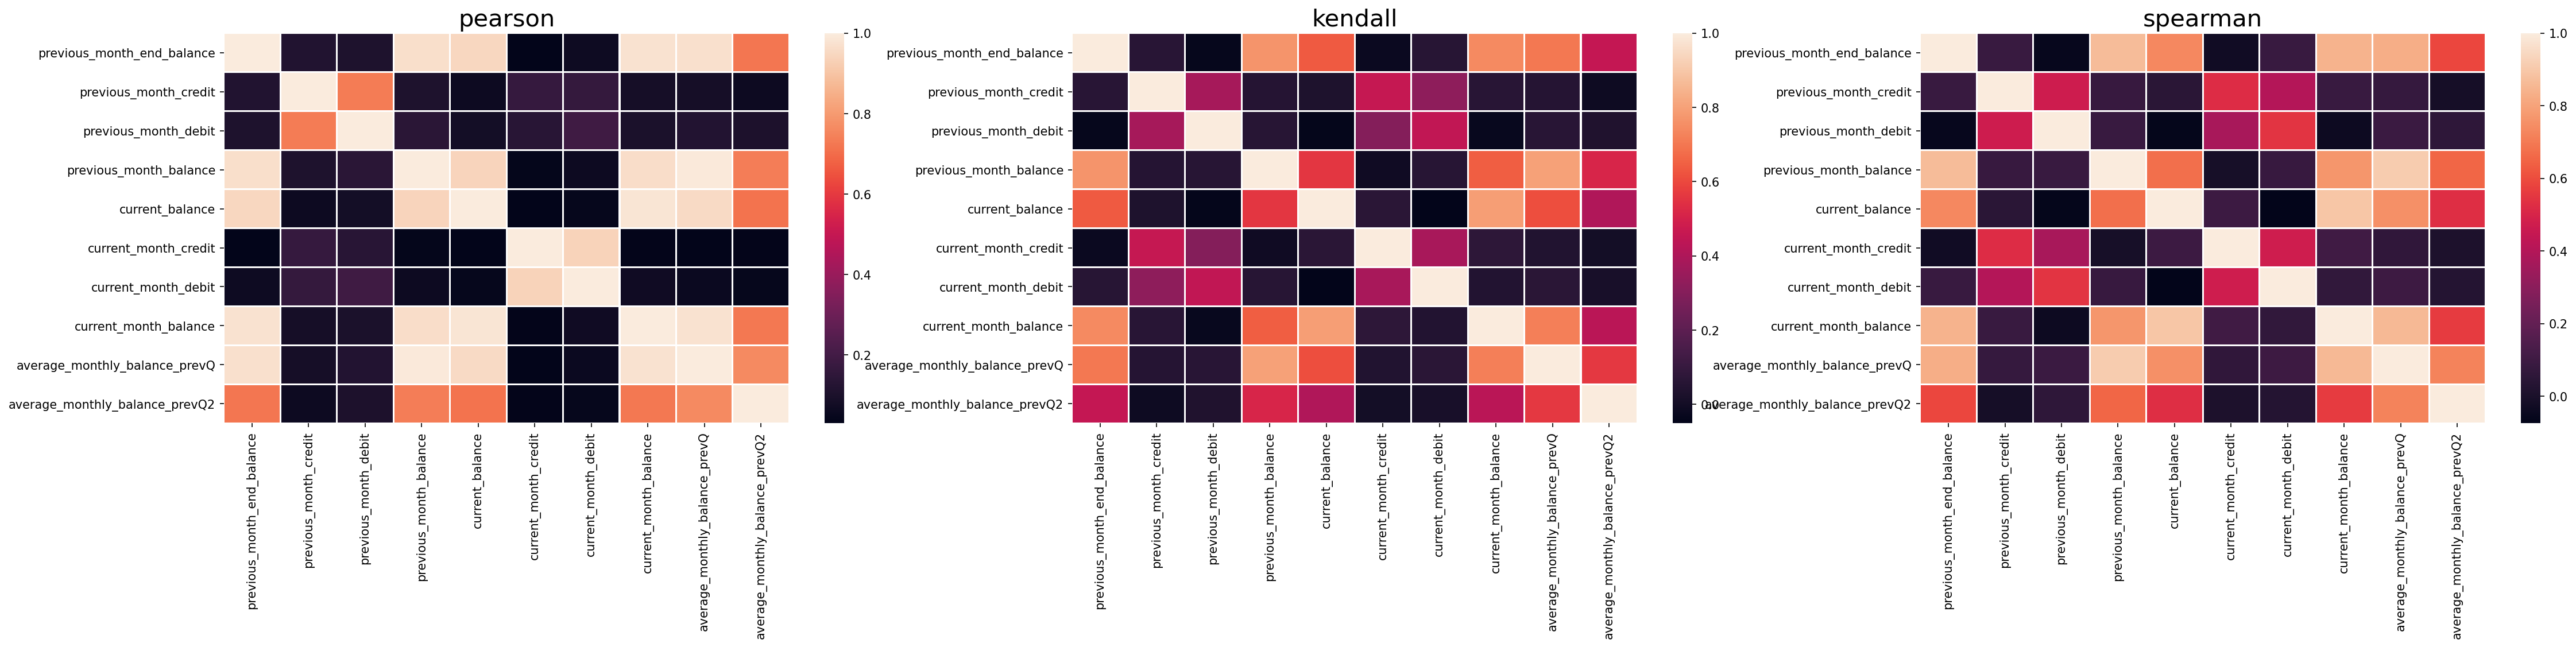

In [117]:
plt.figure(figsize = (36,6), dpi =150)
for j, i in enumerate(['pearson','kendall','spearman']):
        plt.subplot(1,3,j+1)
        correlation = numeric_columns[var].dropna().corr(method = i)
        sns.heatmap(correlation, linewidth = 1)
        plt.title(i, fontsize = 20)

* Transaction variables and balance variables have no correlation among themselves
* balance variables are highly correlated with transaction variables

To visualize them lets go for scatter plot

# Scatter plot

In [119]:
transaction_variables = ['current_month_credit', 'current_month_debit','previous_month_credit', 'previous_month_debit']
balance_variables = ['current_month_balance', 'previous_month_balance','current_balance', 'previous_month_end_balance']


<Figure size 900x600 with 0 Axes>

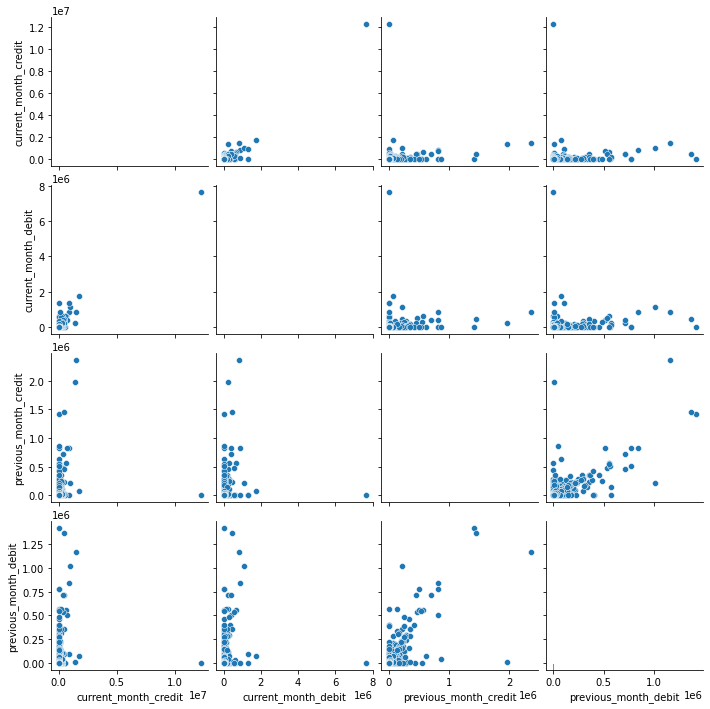

In [121]:
plt.figure(dpi=150)
sns.pairplot(numeric_columns[transaction_variables])


Since there are outliers scatter plots are not visualizing properly

In [122]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numeric_columns[column].min() < 0:
    mini =  abs(numeric_columns[column].min()) + 1
  
  numeric_columns[column] = [i+mini for i in numeric_columns[column]]
  numeric_columns[column] = numeric_columns[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

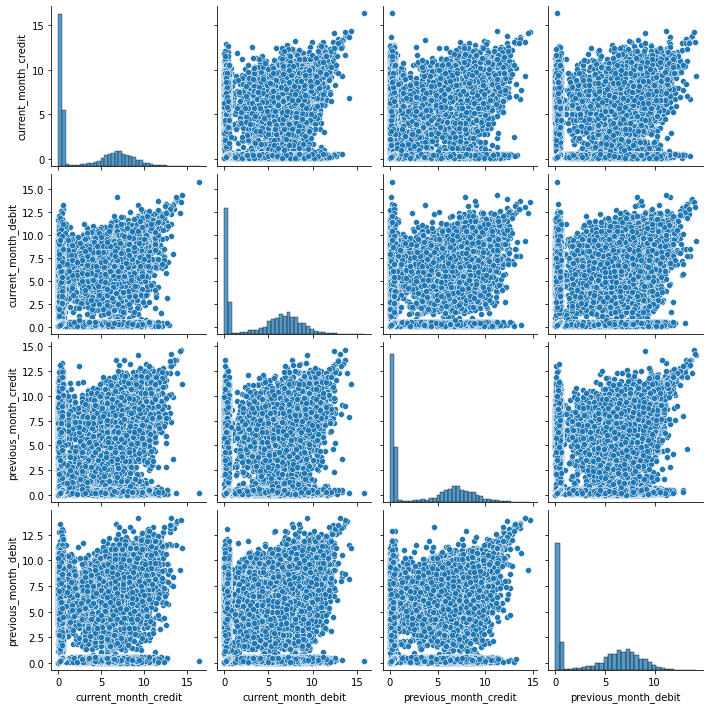

In [125]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numeric_columns[transaction_variables])

All transaction variables are highly correlated

<Figure size 840x560 with 0 Axes>

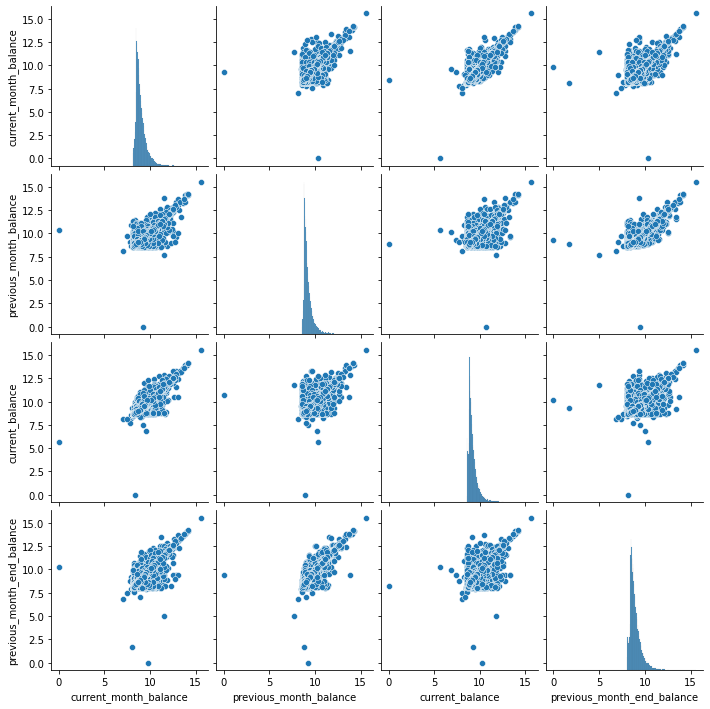

In [127]:
# scatter plot for balance variables
plt.figure(dpi=140)
sns.pairplot(numeric_columns[balance_variables])

<AxesSubplot:xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

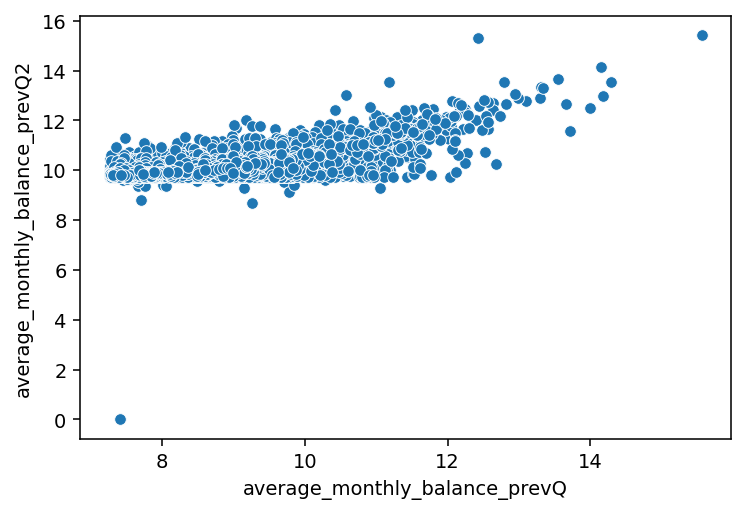

In [128]:
# scatter plot for previous quarter details
plt.figure(dpi=140)
sns.scatterplot(numeric_columns['average_monthly_balance_prevQ'], numeric_columns['average_monthly_balance_prevQ2'])

This clearly visualizing that the quarterly transactions are highly correlated

# MULTIVARIATE ANALYSIS

# Gender, Occupation,Customer networth category with churn

In [129]:
data['gender'] = data['gender'].astype('object')
data['occupation'] = data['occupation'].astype('object')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['churn'] = data['churn'].astype('int')
data['city'] = data['city'].astype('float')
data['branch_code'] = data['branch_code'].astype('float')

In [130]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

# Gender,age, Occupation with churn

In [131]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [132]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

# Gender,Age,Occupation and Current Balance with Churning Status

In [133]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [134]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

### Box Plot

In [135]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')



### Age, Occupation, churn

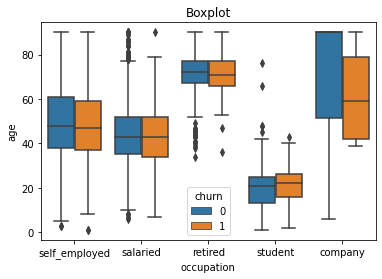

In [136]:
Grouped_Box_Plot(data,'age', 'occupation', 'churn')

### Vintage, Gender, Churn 

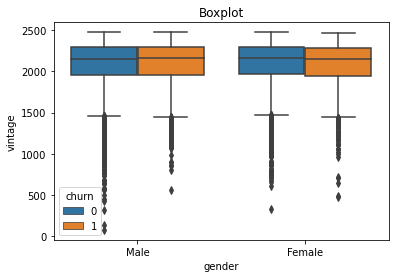

In [137]:
Grouped_Box_Plot(data,'vintage', 'gender', 'churn')

### Pair Plots

In [141]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data2 = pd.DataFrame()

for i in balance_cols:
    data2[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data2.columns

In [142]:
data2['churn'] = data['churn']

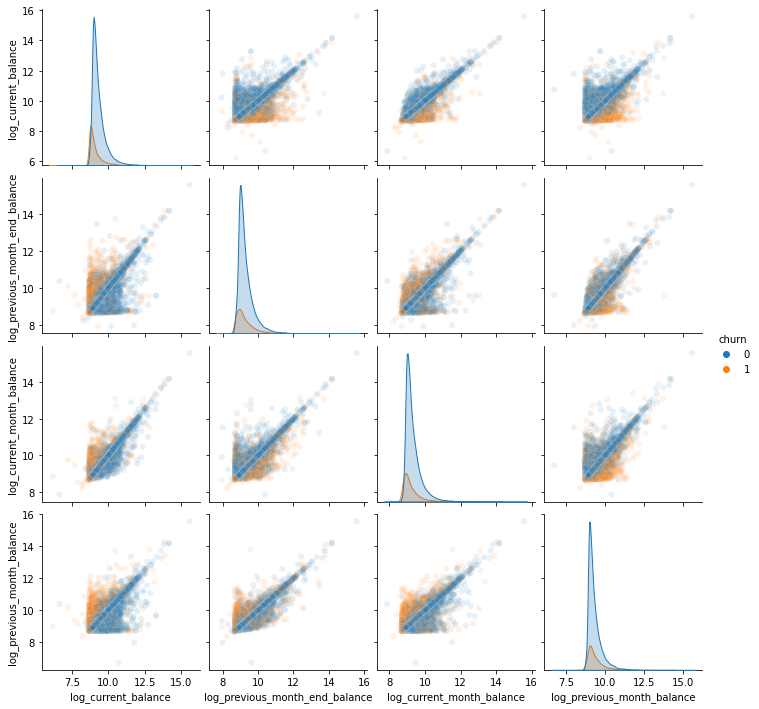

In [143]:
sns.pairplot(data2,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

## Debits and Credits for current and previous months

In [144]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data2 = pd.DataFrame()

for i in cr_dr_cols:
    data2[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data2.columns

In [145]:
data2['churn'] = data['churn']

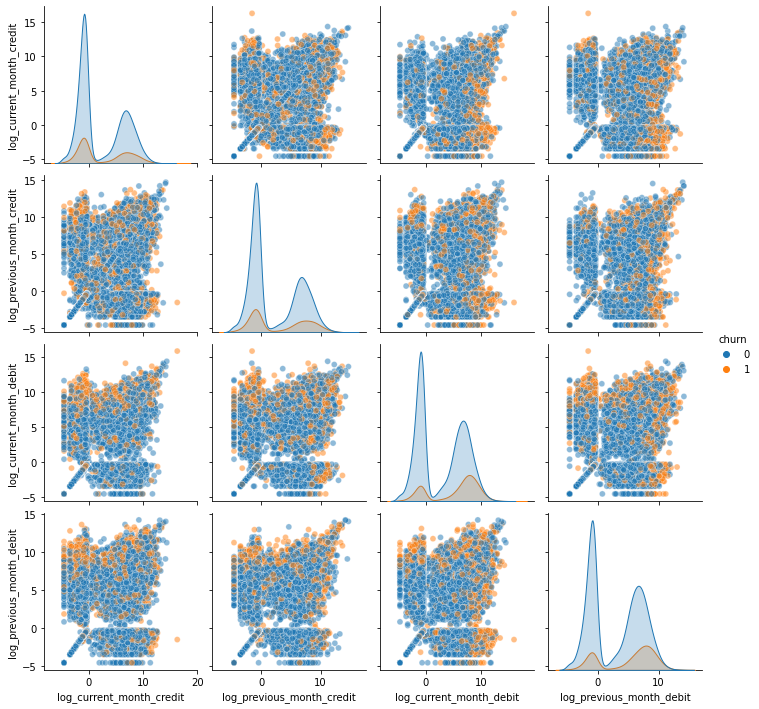

In [147]:
sns.pairplot(data2,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

# Encoding

In [148]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,customer_id,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,week_lt,month_lt,dayofweek_lt,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,2101,66,0,187.0,755.0,1458.71,1458.71,1458.71,1449.07,...,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2,2348,35,0,NaN,3214.0,5390.37,8704.66,7799.26,12419.41,...,44.0,11.0,4.0,1,0,0,1,0,1,0
2,4,2194,31,0,146.0,41.0,3913.16,5815.29,4910.17,2815.94,...,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5,2329,90,<NA>,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,...,32.0,8.0,1.0,0,0,0,1,0,1,0
4,6,1579,42,2,1494.0,388.0,927.72,1401.72,1643.31,1871.12,...,44.0,11.0,6.0,1,0,0,1,0,0,1


In [149]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [150]:
fill_mode(data_encoded)

In [151]:
data_encoded = data_encoded.drop(columns = ['customer_id'], axis =1)

In [152]:
#seperating independent and dependent variables
x = data_encoded.drop(['churn'], axis=1)
y = data_encoded['churn']
x.shape, y.shape

((28382, 26), (28382,))

In [153]:
data_encoded.columns

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'day_lt', 'week_lt', 'month_lt',
       'dayofweek_lt', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [154]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 42)

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [156]:
cols = train_x.columns
cols

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'day_lt', 'week_lt', 'month_lt',
       'dayofweek_lt', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [157]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,week_lt,month_lt,dayofweek_lt,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.831461,0.280899,0.000000,0.971481,0.627275,0.002236,0.001902,0.000645,0.003321,2.934022e-08,...,0.882353,0.909091,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.838119,0.393258,0.000000,0.906553,0.013805,0.000941,0.000605,0.000011,0.003631,4.482534e-08,...,0.862745,0.909091,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.944236,0.303371,0.000000,0.037015,0.330266,0.001842,0.001486,0.000694,0.004352,2.037515e-08,...,0.019608,0.000000,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.909696,0.292135,0.000000,0.135922,0.028446,0.001475,0.000996,0.000213,0.003818,5.239919e-05,...,1.000000,1.000000,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.917187,0.505618,0.038462,0.842233,0.016733,0.001175,0.000722,0.000208,0.003788,5.542042e-08,...,0.901961,0.909091,0.166667,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [158]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,week_lt,month_lt,dayofweek_lt,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.973783,0.584270,0.057692,0.088592,0.594018,0.000949,0.000840,0.000071,0.003828,3.504527e-08,...,0.686275,0.727273,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.564295,0.325843,0.000000,0.202670,0.156662,0.000944,0.000562,0.000018,0.003790,5.623543e-08,...,1.000000,1.000000,0.166667,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.966292,0.348315,0.000000,0.594660,0.136791,0.001180,0.000881,0.000057,0.003372,2.811771e-06,...,0.960784,1.000000,0.833333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.945485,0.741573,0.000000,0.404126,0.149341,0.001440,0.001073,0.000263,0.004306,2.956842e-06,...,0.960784,1.000000,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.640866,0.494382,0.000000,0.665049,0.194938,0.001983,0.001750,0.001222,0.005120,9.361161e-06,...,1.000000,1.000000,0.166667,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Model Building

In [159]:
#importing Logistic Regression and metric accuracy score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

# Calculating accuracy-score
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )

# Predicting over the Test Set and accuracy-score
test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )



Training accuracy_score 0.8261298506060322
Test accuracy_score     0.8331454340473506


### Using Regularization

In [161]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogReg(penalty='l2', C=c,)
    clf.fit(train_x, train_y)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(train_x, train_y))
    print('Test accuracy:', clf.score(test_x, test_y))
    print('')

C: 10
Coefficient of each feature: [[-6.35074982e-04 -2.26041471e-05  1.66641208e-07 -1.62951569e-04
   9.09530953e-05 -2.46612114e-04 -1.66800115e-05  2.29291241e-04
  -1.19246695e-05 -6.67330098e-06 -7.44533928e-06  1.10492813e-05
   9.15445087e-06  2.80180134e-05 -3.15255482e-05 -8.89594827e-05
  -1.17088804e-05 -2.99904567e-06 -7.11879279e-07 -9.87303987e-08
  -9.36037224e-08 -1.47980927e-07 -5.94514095e-08 -7.59935652e-08
  -2.76756328e-07 -1.55391676e-08]]
Training accuracy: 0.8263647467819224
Test accuracy: 0.8337091319052987

C: 1
Coefficient of each feature: [[-6.28814944e-04 -2.06266144e-05  1.12836795e-07 -1.78891864e-04
   8.11615643e-05 -2.39055096e-04 -1.46192897e-05  2.33166042e-04
  -1.20837730e-05 -7.18808023e-06 -7.09712107e-06  1.19030158e-05
   8.77940860e-06  1.69315729e-05 -3.33443353e-05 -8.82436860e-05
  -1.16399194e-05 -2.98167899e-06 -7.22572234e-07 -1.09580919e-07
  -7.79065793e-08 -1.31340720e-07 -8.08623238e-08 -6.56577613e-08
  -2.48855527e-07 -3.11184658e